In [1]:
# Import our libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in and combine corruption perception index 1995 - 2011

cpi_1 = pd.DataFrame()

for i in range(1995, 2012, 1):
    cpi_temp = pd.read_csv(f'./datasets_cpi/{i}_cpi.csv')
    cpi_temp = cpi_temp.loc[:, ['country', 'iso', 'score']]
    cpi_temp['year'] = i
    cpi_temp['score'] = cpi_temp['score'] * 10
    cpi_1 = pd.concat([cpi_1, cpi_temp], ignore_index = True)
    
cpi_1 = cpi_1[['country', 'iso', 'year', 'score']]

In [3]:
cpi_1.head()

,country,iso,year,score
0,New Zealand,NZL,1995,95.5
1,Denmark,DNK,1995,93.2
2,Singapore,SGP,1995,92.6
3,Finland,FIN,1995,91.2
4,Canada,CAN,1995,88.7


In [4]:
# Read in 2012 - 2022 cpi csv and correct format
cpi_2 = pd.DataFrame()

cpi = pd.read_csv('./datasets_cpi/2012_2022_cpi.csv')
cpi_cols = cpi[[col for col in cpi.columns if 'CPI' in col]]
cpi_2[['country', 'iso']] = cpi.iloc[:,:2]
cpi_2 = pd.concat([cpi_2, cpi_cols], axis = 1)
cpi_2

,country,iso,CPI score 2022,CPI score 2021,CPI score 2020,CPI score 2019,CPI score 2018,CPI score 2017,CPI score 2016,CPI score 2015,CPI score 2014,CPI Score 2013,CPI Score 2012
0,Afghanistan,AFG,24.0,16.0,19.0,16.0,16.0,15.0,15.0,11.0,12.0,8.0,8.0
1,Albania,ALB,36.0,35.0,36.0,35.0,36.0,38.0,39.0,36.0,33.0,31.0,33.0
2,United Arab Emirates,ARE,67.0,69.0,71.0,71.0,70.0,71.0,66.0,70.0,70.0,69.0,68.0
3,Angola,AGO,33.0,29.0,27.0,26.0,19.0,19.0,18.0,15.0,19.0,23.0,22.0
4,Argentina,ARG,38.0,38.0,42.0,45.0,40.0,39.0,36.0,32.0,34.0,34.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,Venezuela,VEN,14.0,14.0,15.0,16.0,18.0,18.0,17.0,17.0,19.0,20.0,19.0
177,Vietnam,VNM,42.0,39.0,36.0,37.0,33.0,35.0,33.0,31.0,31.0,31.0,31.0
178,Syria,SYR,13.0,13.0,14.0,13.0,13.0,14.0,13.0,18.0,20.0,17.0,26.0
179,Zambia,ZMB,33.0,33.0,33.0,34.0,35.0,37.0,38.0,38.0,38.0,38.0,37.0


In [5]:
cpi_3 = pd.DataFrame()

j = 12

for i in range(2012, 2023, 1):
    cpi_temp = cpi_2.iloc[:, :2]
    cpi_temp['year'] = i
    cpi_temp['score'] = cpi_2.iloc[:, j]
    cpi_3 = pd.concat([cpi_3, cpi_temp], ignore_index = True)
    j -= 1
cpi_3.head()

,country,iso,year,score
0,Afghanistan,AFG,2012,8.0
1,Albania,ALB,2012,33.0
2,United Arab Emirates,ARE,2012,68.0
3,Angola,AGO,2012,22.0
4,Argentina,ARG,2012,35.0


In [6]:
df_cpi = pd.concat([cpi_1, cpi_3], ignore_index = True)
df_cpi

,country,iso,year,score
0,New Zealand,NZL,1995,95.5
1,Denmark,DNK,1995,93.2
2,Singapore,SGP,1995,92.6
3,Finland,FIN,1995,91.2
4,Canada,CAN,1995,88.7
...,...,...,...,...
4102,Venezuela,VEN,2022,14.0
4103,Vietnam,VNM,2022,42.0
4104,Syria,SYR,2022,13.0
4105,Zambia,ZMB,2022,33.0


In [7]:
df_cpi.isnull().sum()

country     0
iso         0
year        0
score      42
dtype: int64

In [8]:
df_cpi.to_csv('./datasets_cpi/cpi.csv')

In [9]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4107 non-null   object 
 1   iso      4107 non-null   object 
 2   year     4107 non-null   int64  
 3   score    4065 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.5+ KB


In [10]:
# Read in full dataset after melting and merging

df = pd.read_csv('./dataset_metadata/melted_merged_allcolumns_v2.csv')

/var/folders/qy/nr1f_j6j7nx50jtp9tqqgftc0000gn/T/ipykernel_83107/1080606136.py:3: DtypeWarning: Columns (4,7,11,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./dataset_metadata/melted_merged_allcolumns_v2.csv')


In [11]:
# start cleaning data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74742 entries, 0 to 74741
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           70316 non-null  object 
 1   iso                               74742 non-null  object 
 2   year                              74742 non-null  int64  
 3   CPI                               4068 non-null   float64
 4   trade_balance_perc_of_gdp         8730 non-null   object 
 5   life_expectancy                   56646 non-null  float64
 6   journos_imprisoned_yearly         7590 non-null   float64
 7   inflation_annual_perc             10047 non-null  object 
 8   gini_index                        49477 non-null  float64
 9   democracy_index                   2520 non-null   float64
 10  childmor_0_5_per_1000             57527 non-null  float64
 11  cellphone_per_100                 10246 non-null  object 
 12  avrg

In [12]:
# Investigate CPI series as this is the target

df['CPI'].describe()

count    4068.000000
mean       43.076745
std        21.095055
min         4.000000
25%        27.000000
50%        37.000000
75%        56.000000
max       100.000000
Name: CPI, dtype: float64

In [13]:
# Scores of 100 were prior to 2012...scores were 1-10 so we multiplied scores by 10 to get on same scale as 2012 and later years

df[df['CPI'] == 100]

,country,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,...,alcohol_consumption,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,literacy,gdp_per_capita_2017dollar,fertility_rate,extreme_poverty,electricity_access
163,Denmark,DNK,1998,100.0,3.07,76.7,84.5,1.23,23.4,NaN,...,NaN,5.04,NaN,NaN,5298991.0,NaN,46096.370,1.72,NaN,100.0
252,Denmark,DNK,1999,100.0,6,76.7,84.3,1.68,23.6,NaN,...,NaN,5.14,NaN,NaN,5319856.0,NaN,47298.540,1.74,NaN,100.0
359,Finland,FIN,2000,100.0,9.17,78.0,83.2,1.64,27.2,NaN,...,10.00369,11.13,99.44823,NaN,5176208.0,100.0,39894.195,1.73,0.0,100.0


In [14]:
# drop all rows that do not have a CPI value as they will not be used for training

df = df.dropna(subset = 'CPI', ignore_index = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           4052 non-null   object 
 1   iso                               4068 non-null   object 
 2   year                              4068 non-null   int64  
 3   CPI                               4068 non-null   float64
 4   trade_balance_perc_of_gdp         3689 non-null   object 
 5   life_expectancy                   4039 non-null   float64
 6   journos_imprisoned_yearly         3717 non-null   float64
 7   inflation_annual_perc             3959 non-null   object 
 8   gini_index                        4042 non-null   float64
 9   democracy_index                   2454 non-null   float64
 10  childmor_0_5_per_1000             4042 non-null   float64
 11  cellphone_per_100                 3973 non-null   object 
 12  avrg_d

In [16]:
df = df[['trade_balance_perc_of_gdp']].astype(float)

ValueError: could not convert string to float: '-30µ'

In [ ]:
df[df['trade_balance_perc_of_gdp'] == '-30µ']

In [ ]:
df.iloc[2755,4] = -30

In [ ]:
df['trade_balance_perc_of_gdp'] = df['trade_balance_perc_of_gdp'].astype(float)

In [ ]:
df['inflation_annual_perc'] = df['inflation_annual_perc'].astype(float)

In [ ]:
df['cellphone_per_100'] = df['cellphone_per_100'].astype(float)

In [17]:
df['linguistic_div_index'] = df['linguistic_div_index'].astype(float)

ValueError: could not convert string to float: '-'

In [18]:
df[df['linguistic_div_index'] == '-']

,country,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,...,alcohol_consumption,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,literacy,gdp_per_capita_2017dollar,fertility_rate,extreme_poverty,electricity_access
716,Serbia,SRB,2003,23.0,-14.9,72.2,66.5,12.5,32.8,NaN,...,NaN,15.200,95.423935,2.7,7887466.0,96.39724,10616.243,1.69,0.380461,100.00000
860,Serbia,SRB,2004,27.0,-24,72.3,66.1,8.12,35.5,NaN,...,NaN,18.500,95.421800,2.5,7863399.0,NaN,11601.737,1.66,0.796668,100.00000
996,Serbia,SRB,2005,28.0,-17.1,72.3,65.8,14.7,36.5,NaN,...,NaN,20.850,95.605610,2.5,7830944.0,NaN,12280.192,1.64,0.787740,99.69072
1146,Serbia,SRB,2006,30.0,-18,72.7,71.8,12.4,29.7,66.2,...,NaN,20.850,95.789764,2.5,7794792.0,NaN,12958.291,1.61,0.470529,100.00000
1299,Serbia,SRB,2007,34.0,-21,73.2,72.3,8.7,28.7,65.5,...,NaN,18.060,95.974290,2.5,7758181.0,NaN,13848.781,1.60,0.369309,100.00000
1537,Serbia,SRB,2008,34.0,-21.8,73.5,72.4,9.09,27.6,64.9,...,NaN,13.700,96.159130,2.5,7722801.0,NaN,14694.432,1.58,0.111986,100.00000
1661,Serbia,SRB,2009,35.0,-13.3,73.6,71.7,7.89,28.0,64.1,...,NaN,16.140,96.344310,2.5,7688037.0,NaN,14350.445,1.58,0.144502,100.00000
1840,Serbia,SRB,2010,35.0,-12.2,74.1,69.4,5.73,29.0,63.3,...,9.93455,19.220,96.529800,2.5,7653749.0,NaN,14513.582,1.58,0.097779,99.71840
2078,Serbia,SRB,2011,33.0,-12.8,74.3,69.6,8.91,34.0,63.3,...,NaN,22.970,96.715690,2.6,7620925.0,97.96241,14926.494,1.58,NaN,100.00000
2257,Serbia,SRB,2012,39.0,-13.8,74.8,68.9,6.2,39.9,63.3,...,NaN,24.000,96.899270,2.6,7591357.0,NaN,14896.884,1.58,5.340191,100.00000


In [19]:
df['linguistic_div_index'].replace('-', 'NaN', inplace = True)

In [20]:
df['linguistic_div_index'] = df['linguistic_div_index'].astype(float) 

In [21]:
df['religious_div_index'] = df['religious_div_index'].astype(float)

ValueError: could not convert string to float: '-'

In [22]:
df[df['religious_div_index'] == '-']

,country,iso,year,CPI,trade_balance_perc_of_gdp,life_expectancy,journos_imprisoned_yearly,inflation_annual_perc,gini_index,democracy_index,...,alcohol_consumption,unemployment_perc_tot_labor,pop_percent_with_sanitation,undernourishment_prevalence_perc,population,literacy,gdp_per_capita_2017dollar,fertility_rate,extreme_poverty,electricity_access
716,Serbia,SRB,2003,23.0,-14.9,72.2,66.5,12.5,32.8,NaN,...,NaN,15.200,95.423935,2.7,7887466.0,96.39724,10616.243,1.69,0.380461,100.00000
860,Serbia,SRB,2004,27.0,-24,72.3,66.1,8.12,35.5,NaN,...,NaN,18.500,95.421800,2.5,7863399.0,NaN,11601.737,1.66,0.796668,100.00000
996,Serbia,SRB,2005,28.0,-17.1,72.3,65.8,14.7,36.5,NaN,...,NaN,20.850,95.605610,2.5,7830944.0,NaN,12280.192,1.64,0.787740,99.69072
1146,Serbia,SRB,2006,30.0,-18,72.7,71.8,12.4,29.7,66.2,...,NaN,20.850,95.789764,2.5,7794792.0,NaN,12958.291,1.61,0.470529,100.00000
1299,Serbia,SRB,2007,34.0,-21,73.2,72.3,8.7,28.7,65.5,...,NaN,18.060,95.974290,2.5,7758181.0,NaN,13848.781,1.60,0.369309,100.00000
1537,Serbia,SRB,2008,34.0,-21.8,73.5,72.4,9.09,27.6,64.9,...,NaN,13.700,96.159130,2.5,7722801.0,NaN,14694.432,1.58,0.111986,100.00000
1661,Serbia,SRB,2009,35.0,-13.3,73.6,71.7,7.89,28.0,64.1,...,NaN,16.140,96.344310,2.5,7688037.0,NaN,14350.445,1.58,0.144502,100.00000
1840,Serbia,SRB,2010,35.0,-12.2,74.1,69.4,5.73,29.0,63.3,...,9.93455,19.220,96.529800,2.5,7653749.0,NaN,14513.582,1.58,0.097779,99.71840
2078,Serbia,SRB,2011,33.0,-12.8,74.3,69.6,8.91,34.0,63.3,...,NaN,22.970,96.715690,2.6,7620925.0,97.96241,14926.494,1.58,NaN,100.00000
2257,Serbia,SRB,2012,39.0,-13.8,74.8,68.9,6.2,39.9,63.3,...,NaN,24.000,96.899270,2.6,7591357.0,NaN,14896.884,1.58,5.340191,100.00000


In [23]:
df['religious_div_index'].replace('-', 'NaN', inplace = True)

In [24]:
df['religious_div_index'] = df['religious_div_index'].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           4052 non-null   object 
 1   iso                               4068 non-null   object 
 2   year                              4068 non-null   int64  
 3   CPI                               4068 non-null   float64
 4   trade_balance_perc_of_gdp         3689 non-null   object 
 5   life_expectancy                   4039 non-null   float64
 6   journos_imprisoned_yearly         3717 non-null   float64
 7   inflation_annual_perc             3959 non-null   object 
 8   gini_index                        4042 non-null   float64
 9   democracy_index                   2454 non-null   float64
 10  childmor_0_5_per_1000             4042 non-null   float64
 11  cellphone_per_100                 3973 non-null   object 
 12  avrg_d

In [26]:
# Create dataframe of null count by feature per year to aid in feature selection null resolution

df_null = pd.DataFrame(columns = ['year', 'null_count', 'feature'])
cols = df.columns[4:]
i = 0

for year in range(1995, 2023, 1):
    for col in cols:
        df_null.loc[i, 'year'] = year
        df_null.loc[i,'null_count'] = df.loc[df['year'] == year, col].isnull().sum()
        df_null.loc[i,'feature'] = col
        i += 1


In [27]:
df_null

,year,null_count,feature
0,1995,1,trade_balance_perc_of_gdp
1,1995,0,life_expectancy
2,1995,1,journos_imprisoned_yearly
3,1995,1,inflation_annual_perc
4,1995,0,gini_index
...,...,...,...
947,2022,136,literacy
948,2022,180,gdp_per_capita_2017dollar
949,2022,4,fertility_rate
950,2022,180,extreme_poverty


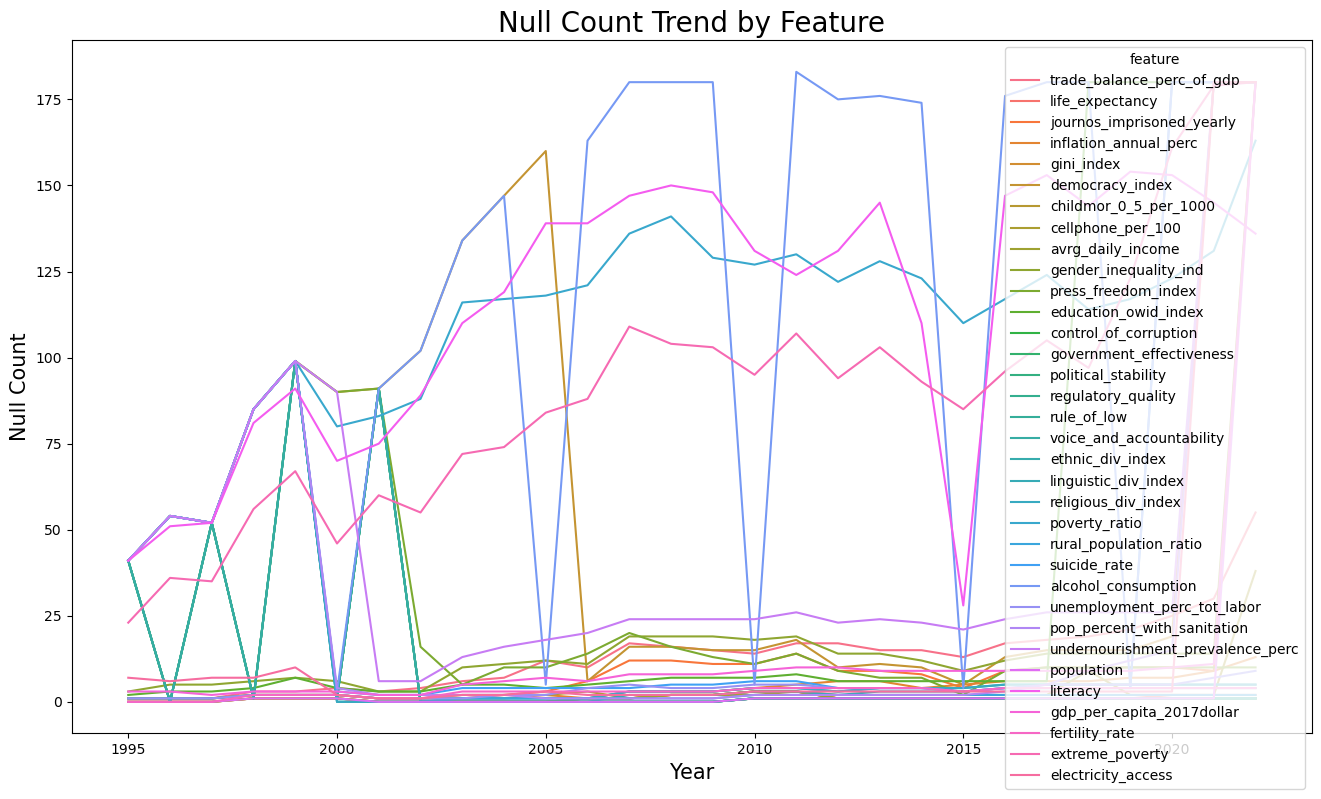

In [28]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = df_null,
             x = 'year', 
             y = 'null_count', 
             hue = 'feature')
plt.title('Null Count Trend by Feature', size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel('Null Count', size = 15);
plt.savefig('./images/null_count_trend')

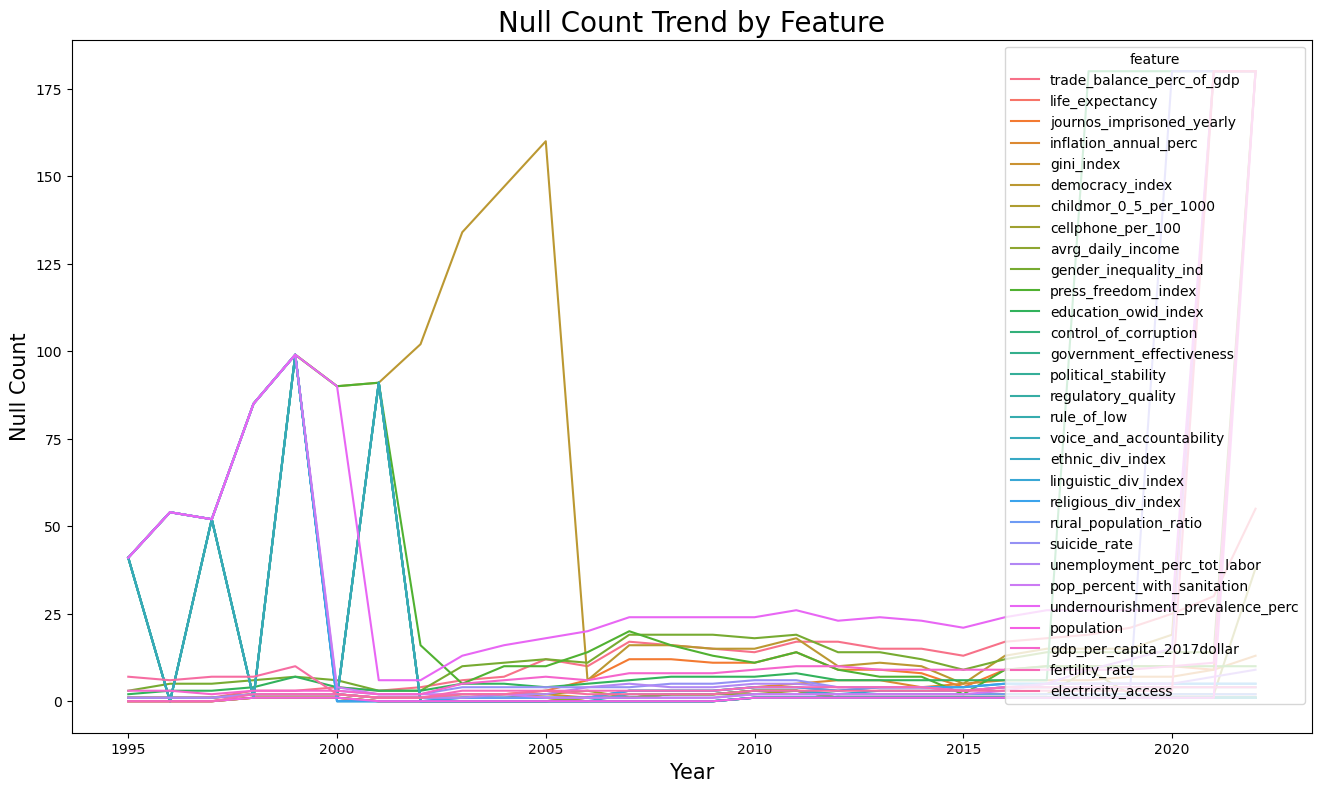

In [29]:
# Drop columns 'literacy', 'alcohol_consumption', 'poverty_ratio', 'extreme_poverty'

df_null = pd.DataFrame(columns = ['year', 'null_count', 'feature'])
df.drop(columns = ['literacy', 'alcohol_consumption', 'poverty_ratio', 'extreme_poverty'], inplace = True)
cols = df.columns[4:]

i = 0

for year in range(1995, 2023, 1):
    for col in cols:
        df_null.loc[i, 'year'] = year
        df_null.loc[i,'null_count'] = df.loc[df['year'] == year, col].isnull().sum()
        df_null.loc[i,'feature'] = col
        i += 1

plt.figure(figsize = (16, 9))
sns.lineplot(data = df_null,
             x = 'year', 
             y = 'null_count', 
             hue = 'feature')
plt.title('Null Count Trend by Feature', size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel('Null Count', size = 15);
plt.savefig('./images/null_count_trend')

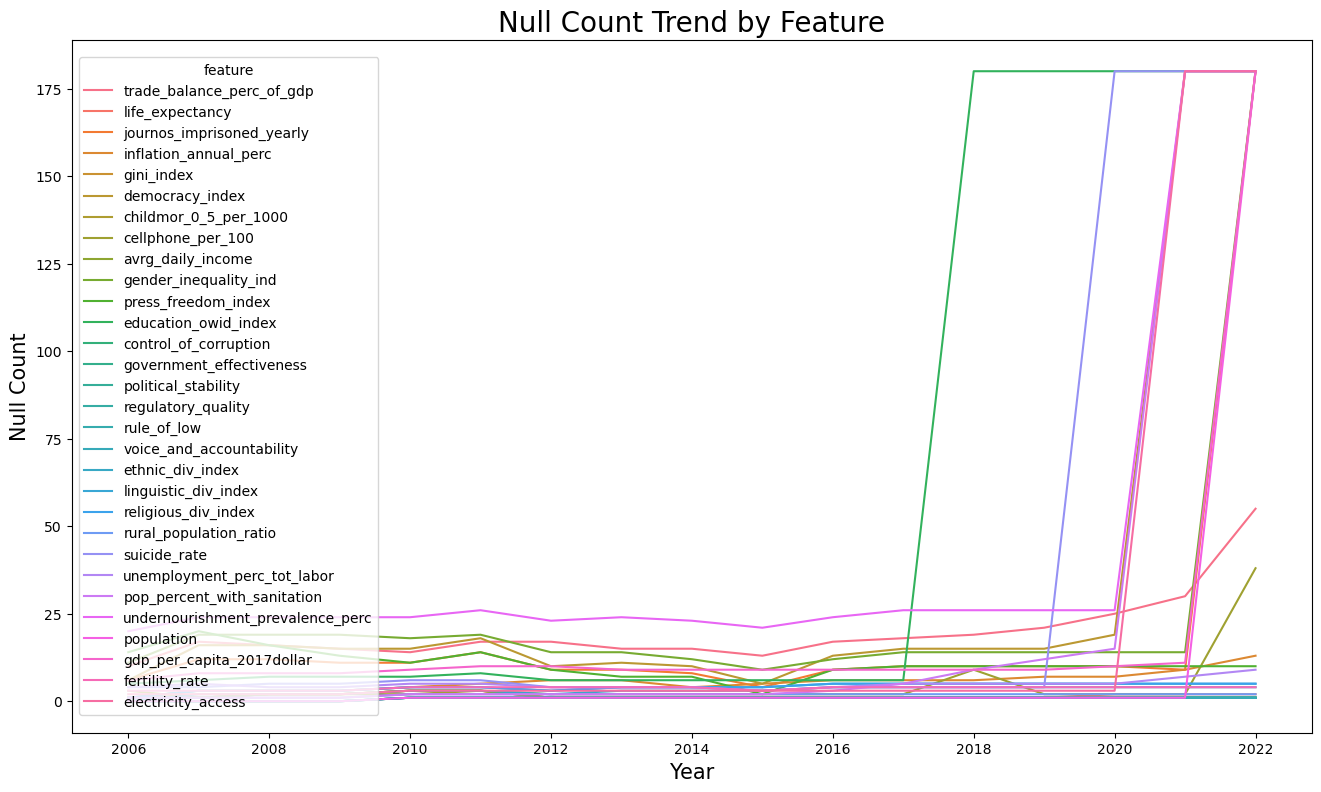

In [30]:
# Drop data prior to 2006

df_null = pd.DataFrame(columns = ['year', 'null_count', 'feature'])
#df.drop(columns = ['literacy', 'alcohol_consumption', 'poverty_ratio', 'extreme_poverty'], inplace = True)
cols = df.columns[4:]

i = 0

for year in range(2006, 2023, 1):
    for col in cols:
        df_null.loc[i, 'year'] = year
        df_null.loc[i,'null_count'] = df.loc[df['year'] == year, col].isnull().sum()
        df_null.loc[i,'feature'] = col
        i += 1

plt.figure(figsize = (16, 9))
ax = sns.lineplot(data = df_null,
             x = 'year', 
             y = 'null_count', 
             hue = 'feature')
sns.move_legend(ax, 'center left')
plt.title('Null Count Trend by Feature', size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel('Null Count', size = 15);
plt.savefig('./images/null_count_trend')

In [31]:
df_null.groupby(['year', 'feature'])['null_count'].max().sort_values(ascending = False).head(30)

year  feature                         
2022  gender_inequality_ind               180
      journos_imprisoned_yearly           180
      democracy_index                     180
2021  democracy_index                     180
2022  pop_percent_with_sanitation         180
      population                          180
2020  suicide_rate                        180
2022  gdp_per_capita_2017dollar           180
2020  education_owid_index                180
2022  electricity_access                  180
2021  education_owid_index                180
      electricity_access                  180
2022  suicide_rate                        180
2018  education_owid_index                180
2021  undernourishment_prevalence_perc    180
2019  education_owid_index                180
2021  pop_percent_with_sanitation         180
      suicide_rate                        180
2022  undernourishment_prevalence_perc    180
      education_owid_index                180
      trade_balance_perc_of_gdp          

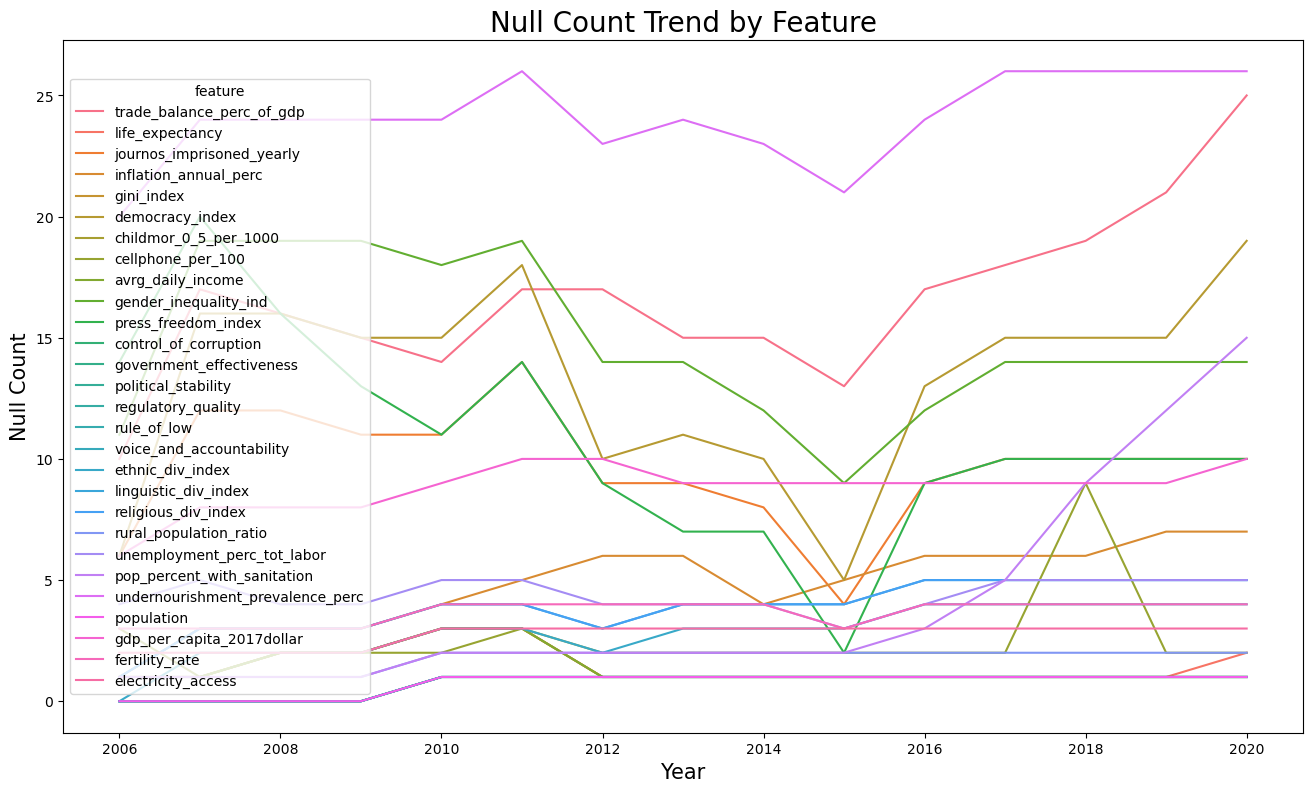

In [32]:
# Drop data after 2020 and columns 'education_owid_index', 'suicide_rate'

df_null = pd.DataFrame(columns = ['year', 'null_count', 'feature'])
df.drop(columns = ['education_owid_index', 'suicide_rate'], inplace = True)
cols = df.columns[4:]

i = 0

for year in range(2006, 2021, 1):
    for col in cols:
        df_null.loc[i, 'year'] = year
        df_null.loc[i,'null_count'] = df.loc[df['year'] == year, col].isnull().sum()
        df_null.loc[i,'feature'] = col
        i += 1

plt.figure(figsize = (16, 9))
ax = sns.lineplot(data = df_null,
             x = 'year', 
             y = 'null_count', 
             hue = 'feature')
sns.move_legend(ax, 'center left')
plt.title('Null Count Trend by Feature', size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel('Null Count', size = 15);
plt.savefig('./images/null_count_trend')

In [33]:
# modify dataframe to reflect above charts
df = df.loc[(df['year'] > 2005) & (df['year'] < 2021)]
df.shape

(2653, 32)

In [34]:
df_nonull = df.dropna()
df_nonull.shape

(1860, 32)

In [35]:
df_nonull.to_csv('./datasets/1860_no_null.csv')